In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import grangercausalitytests
import pickle
from sklearn.model_selection import train_test_split
import re


from FRUFS import FRUFS
import matplotlib.pyplot as plt
import optuna
import joblib, gc
import lightgbm as lgb
import seaborn as sns

from sklearn.datasets import make_regression
from scipy.stats import pearsonr
from tqdm.notebook import trange, tqdm
from FRUFS import FRUFS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

/home/apoletaev/miniconda3/envs/test1/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_aapl = pd.read_csv("df_aaple.csv")

df_medium = df_aapl.iloc[:2000,:16]


In [4]:
df = pd.read_csv("sun_x_train.csv")
df

,Close.L1,Close.L2,Close.L3,Close.L4,Close.L5,Close.L6,Adj. Close.L1,P/E (LTM).L1,EPS - Est Low (NTM).L1
0,23.290,23.71,23.48,23.66,24.28,23.73,-0.264607,-0.567380,0.0
1,23.690,23.29,23.71,23.48,23.66,24.28,0.252007,0.540362,0.0
2,23.220,23.69,23.29,23.71,23.48,23.66,-0.296108,-0.634925,0.0
3,23.220,23.22,23.69,23.29,23.71,23.48,0.000000,0.000000,0.0
4,23.495,23.22,23.22,23.69,23.29,23.71,0.173255,0.371499,0.0
...,...,...,...,...,...,...,...,...,...
1574,19.320,19.42,19.32,19.79,19.79,20.19,-0.075828,-0.057438,0.0
1575,19.890,19.32,19.42,19.32,19.79,19.79,0.432221,0.327395,0.0
1576,19.750,19.89,19.32,19.42,19.32,19.79,-0.106159,-0.080413,0.0
1577,20.060,19.75,19.89,19.32,19.42,19.32,0.235067,0.178057,0.0


In [5]:
model_frufs_generated = FRUFS(
        model_r=lgb.LGBMRegressor(random_state=42),
        k=5
        #categorical_features = ["#Buys", "# Hold", "# Sell", "Total Rec"]
    )
model_frufs_generated.fit(df.iloc[:,:])

Progress bar: 100%|██████████| 9/9 [00:03<00:00,  2.69it/s]


In [6]:
pruned_df = model_frufs_generated.transform(df)


In [8]:
pruned_df.to_csv("pruned_df.csv", index=False)

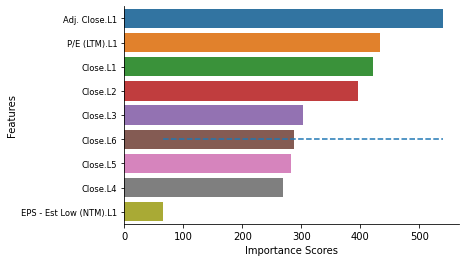

In [12]:
model_frufs_generated.feature_importance()

In [6]:
import logging

In [ ]:
# set up logging to console
console = logging.StreamHandler()
console.setLevel(logging.DEBUG)
# set a format which is simpler for console use
formatter = logging.Formatter('%(name)-12s: %(levelname)-8s %(message)s')
console.setFormatter(formatter)
# add the handler to the root logger
logging.getLogger('').addHandler(console)

logger = logging.getLogger(__name__)

In [16]:
logging.info("Error")